## Preparación de datos

### Importación de librerías

In [519]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Carga de datos

In [520]:
videogames_df = pd.read_csv('../datasets/games.csv')

##### Descripción de columnas

* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Rating (ESRB)

*Es posible que los datos de 2016 estén incompletos.

##### Descripción de Rating (ESRB)

| Clasificación |      Nombre     | Edad Mínima |                               Descripción                               |
|:-------------:|:---------------:|:-----------:|:-----------------------------------------------------------------------:|
| E             | Everyone        | Todos       | Para todos. Contenido apropiado para todas las edades.                  |
| E10+          | Everyone 10+    | 10+         | Para mayores de 10. Contenido adecuado para niños mayores.              |
| EC            | Early Childhood | 3+          | Para niños pequeños. Contenido educativo o de entretenimiento.          |
| K-A           | Kids to Adults  | Todos       | (Anteriormente usado) Similar a E, apropiado para todos.                |
| T             | Teen            | 13+         | Para adolescentes. Contenido adecuado para mayores de 13.               |
| M             | Mature          | 17+         | Para mayores de 17. Contenido maduro con violencia intensa o explícita. |
| AO            | Adults Only     | 18+         | Solo para adultos. Contenido extremadamente gráfico.                    |
| RP            | Rating Pending  | N/A         | Clasificación pendiente, aún no revisado por ESRB.                      |

### Información general y muestra de datos

In [521]:
videogames_df.info(show_counts=True)
print('\nMuestra:\n', videogames_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Muestra:
                        Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform 

### Corregir datos

En esta etapa, se van a corregir los errores encontrados en los datos, como: nombres de columnas, valores duplicados, valores ausentes, cambios de tipos de datos. 

1. En primera instancia se van a cambiar todos los nombres de columnas a minúsculas y quitar los espacios en caso de que existan,
2. luego, se a revisar en cuáles años hay menor cantidad de datos y filtrarlos para mantener solo los años relevantes,
3. posteriormente, se va a cambiar el tipo de datos de `year_of_release` de *float64* a *int64*,
4. despues, las columnas `critic_score` y `user_score` se van a cambiar a tipo de *object*,
5. luego, lidiaremos con los valores ausentes en cada columna,
6. y finalmente, se va a crear una nueva columna con los datos de las ventas totales `total_sales`.


In [522]:
# cambia a minúsculas los nombres de columnas

new_columns_names = []  # nueva lista vacía

# bucle que itera sobre las columnas del DF
for old_columns in videogames_df:
    new_columns = old_columns.lower()   # cambia los nombres a minúsculas
    col_stripped = new_columns.strip()  # quita los espacios
    # agrega a la lista de new_column_names
    new_columns_names.append(col_stripped)

videogames_df.columns = new_columns_names   # reemplaza los nombres

print(videogames_df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### Duplicados explícitos y duplicados implícitos

In [523]:
# Selecciona las columnas a revisar y mostrar los valores únicos para cada una
columns_to_check = ['platform', 'genre',
                    'rating', 'critic_score', 'user_score']

for column in columns_to_check:
    unique_values = videogames_df[column].unique()
    print(f"{column} valores únicos:\n{unique_values}\n")

platform valores únicos:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

genre valores únicos:
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

rating valores únicos:
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

critic_score valores únicos:
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

user_score valores únicos:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.

In [524]:
# Imprime las suma de las filas duplicadas
print(videogames_df.duplicated().sum())

0


### Valores ausentes

In [525]:
# suma los valores austentes en cada columna
print(videogames_df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: count, dtype: int64


<Axes: xlabel='year_of_release'>

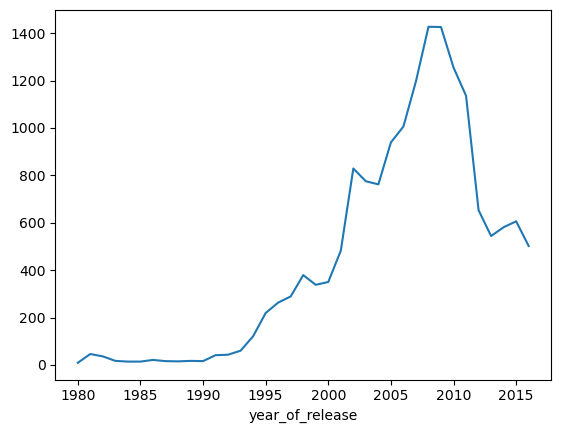

In [526]:
# contando los valores en cada año
print(videogames_df['year_of_release'].value_counts(dropna=False).sort_index())

videogames_df.groupby('year_of_release')['name'].count().plot(kind='line')

In [527]:
# filtra para obtener True en los años mayores a 1994
videogames_df_filter_year = videogames_df['year_of_release'] >= 1993

# creando un nuevo DF filtrado que manteniendo las columnas donde el filtro 'videogames_df_filter_year' sea True y restablece el index
games = videogames_df[videogames_df_filter_year].reset_index(drop=True)

print('Total de filas eliminadas', videogames_df['year_of_release'].count()-games['year_of_release'].count(),'\n')

print(games['year_of_release'].value_counts(dropna=False).sort_index())

Total de filas eliminadas 305 

year_of_release
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64


In [528]:
def fill_values(df, column_name, fill_column):
    """
    Rellena valores ausentes en la columna `fill_column` usando los valores no nulos de la misma
    columna en otros registros con el mismo valor en la columna `column_name`.
    
    Parameters:
        df (pd.DataFrame): DataFrame en el que se realizará el relleno.
        column_name (str): Nombre de la columna con valores que determinan el agrupamiento (e.g., 'name').
        fill_column (str): Nombre de la columna con valores que serán rellenados.
    
    Returns:
        pd.DataFrame: DataFrame con los valores ausentes rellenados.
    """
    # Rellena los valores nulos con el primer valor no nulo encontrado en cada grupo
    df[fill_column] = df.groupby(column_name)[fill_column].transform(lambda x: x.ffill().bfill())
    return df

# Rellenar valores ausentes en la columna 'rating' usando los valores de la misma columna en registros duplicados
games = fill_values(games, 'name', 'rating')

# Rellenar valores ausentes en la columna 'genre' usando los valores de la misma columna en registros duplicados
games = fill_values(games, 'name', 'genre')

# Rellenar valores ausentes en la columna 'year_of_release' usando los valores de la misma columna en registros duplicados
games = fill_values(games, 'name', 'year_of_release')

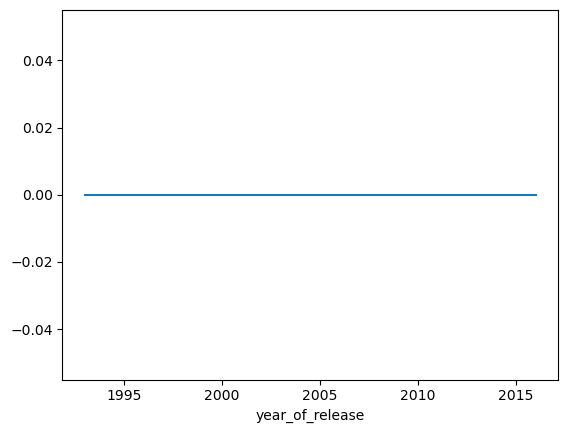

Valores ausentes en rating: 0


In [551]:
# imprime una gráfica mostrando en cuáles años se tienen valores ausentes en la columna 'rating'
games['rating'].isna().groupby(games['year_of_release']).sum().plot(kind='line')

plt.show()

print(f'Valores ausentes en rating:',games['rating'].isna().sum())

In [530]:
# rellena los valores ausentes de la columna rating a RP (rating pending)
games['rating'] = games['rating'].fillna('RP')

In [531]:
# imprime las filas con valores ausentes en la columna 'name'
print(games[games['name'].isna()], '\n')

# elimina las filas con valores ausentes en columna 'name'
games.dropna(subset='name', inplace=True)


      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
605    NaN      GEN              NaN   NaN      1.78      0.53      0.00   
13722  NaN      GEN              NaN   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
605           0.08           NaN        NaN     RP  
13722         0.00           NaN        NaN     RP   



In [532]:
# confirmando valores ausentes
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8159
user_score         6303
rating                0
dtype: int64


In [533]:
# crea una columna nueva para 'critic_score' que se mantenga en tipo de datos float
games['critic_score_float'] = games['critic_score']

# imprime la suma de los valores ausentes en la columna 'critic_score'
print( games['critic_score'].isna().sum())

# rellena valores ausentes en columna 'critic_score' con 'not_rated'
games['critic_score'] = games['critic_score'].fillna('not_rated')

8159


In [534]:
# imprime la suma de los valores 'tbd' en la columna 'user_score'
print((games['user_score'] == 'tbd').sum())

# imprime la suma de los valores ausentes en la columna 'user_score'
print(games['user_score'].isna().sum())

2376
6303


In [535]:
# crea una nueva columna para 'user_score' y reemplaza 'not_rated' con valores nan
games['user_score_float'] = games['user_score'].replace('tbd',np.nan)
games['user_score_float'] = games['user_score_float'].astype('float')

# rellena valores ausentes en columna 'user_score' con 'not_rated'
games['user_score'] = games['user_score'].fillna('not_rated')

In [536]:
games[['critic_score_float','user_score_float']].describe()

,critic_score_float,user_score_float
count,7980.000000,7460.000000
mean,68.994236,7.127024
std,13.920962,1.498533
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


### Enriquecimiento de datos

In [537]:
# creando columna de 'total_sales' que suma las ventas de todas las regiones

games['total_sales'] = games[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum(axis=1)
print(games.sample(5))

                                                    name platform  \
8346                                              DiRT 3       PC   
6241       TOCA Race Driver 2: Ultimate Racing Simulator      PSP   
12704               PQ2: Practical Intelligence Quotient      PSP   
15464  Elminage II DS Remix: Sousei no Megami to Unma...       DS   
9460                              Alice: Madness Returns       PC   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
8346            2011.0        Racing      0.00      0.13      0.00   
6241            2005.0        Racing      0.00      0.25      0.00   
12704           2006.0        Puzzle      0.04      0.00      0.00   
15464           2010.0  Role-Playing      0.00      0.00      0.02   
9460            2011.0     Adventure      0.00      0.10      0.00   

       other_sales critic_score user_score rating  critic_score_float  \
8346          0.03         86.0        6.9      T                86.0   
6241          0.00

In [538]:
# crea DF con nombres de consolas + compañías productoras para referenciar

platform = [
    'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64',
    'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT',
    'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'
]

manufacturer = [
    'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Microsoft', 'Sony', 'Sony', 'Nintendo',
    'Nintendo', 'Sony', 'Nintendo', 'Nintendo', 'Sony', 'Microsoft', 'Others', 'Atari',
    'Sony', 'Microsoft', 'Nintendo', 'Nintendo', 'Sega', 'Sega', 'Sony', 'Sega',
    'Sega', 'Bandai', 'SNK', 'NEC', 'Panasonic', 'Sega', 'NEC'
]

# crear el DF
platforms_df = pd.DataFrame({
    'platform': platform,
    'manufacturer': manufacturer
})


# agrega la información de la compañía al DF 'games' 
games = games.merge(platforms_df, left_on='platform', right_on='platform', how='left')

# muestra del DF
print(games.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1            Mario Kart Wii      Wii           2008.0        Racing     15.68   
2         Wii Sports Resort      Wii           2009.0        Sports     15.61   
3  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   
4     New Super Mario Bros.       DS           2006.0      Platform     11.28   

   eu_sales  jp_sales  other_sales critic_score user_score rating  \
0     28.96      3.77         8.45         76.0          8      E   
1     12.76      3.79         3.29         82.0        8.3      E   
2     10.93      3.28         2.95         80.0          8      E   
3      8.89     10.22         1.00    not_rated  not_rated     RP   
4      9.14      6.50         2.88         89.0        8.5      E   

   critic_score_float  user_score_float  total_sales manufacturer  
0                76.0         

In [539]:
# Listas de tipps de consolas
xbox = ['XB', 'X360', 'XOne']
ps = ['PS', 'PS2', 'PS3', 'PS4']
ps_handheld = ['PSP', 'PSV']
nintendo = ['NES','SNES','N64','GC','Wii','WiiU']
nintendo_handheld = ['GB', 'GC', 'GBA', 'DS', '3DS']

### Resumen de modificaciones y correcciones

**Formatos de columnas:**<br>
En esta sección, se modificó el nombre de las columnas homologando su formato. 

**Columna `year_of_release`**<br>
Se comenzó revisando cuántos datos existían de cada año y basado en esta información se filtraron y eliminaron los años anteriores a *1993* ya que no contenían suficiente información para que fueran relevantes para este informe, se eliminaron un total de 305 filas. 

**Duplicados**<br>
* No se encontraron duplicados explícitos cuando se buscaron filas completamente duplicadas.
* Tampoco se encontraron duplicados implícitos cuando se buscaron valores únicos con la misma información en las columnas `platform`, `genre` y `rating` que son columnas categóricas en las que se podrían esperar este tipo de errores.

**Valores ausentes**<br>
Bajo la suposición de que podrían exisistir videojuegos que en unas consolas sí tuvieran un rating o género o año de lanzamiento y en otras consolas tuvieran valores ausentes en estas columnas, se creó la función de `fill_values` que rellena los valores ausentes en una columna `fill_column` usando los valores no nulos de la misma columna en otros registros con el mismo valor en la columna `column_name`, al final comparando los valores ausentes en el DF no se encontraron diferencias.

* En el caso de la columna de `rating` los valores ausentes (5975) se rellenaron con "RP" (Rating Peding).
* Para la columna `user_score` los valores con el string 'tbd' (2,376) se dejaron así y en el caso de los valores ausentes (6,303) se rellenaron con 'not_rated'.
* en la columna `critic_score`, los valores ausentes nan: 8,159 se rellenaron con 'not rated'.


Para evitar errores con el tipo de datos con las columnas `user_score` y `critic_score`, se crearon las columnas nuevas `user_score_float` y `critic_score_float`, en estas columnas los strings 'not_rated' y 'tbd' se convirtieron a valores ausentes para tener un resultado más preciso a la hora de realizar cálculos.

* También existían 2 filas con valores ausentes en la columna `name` las cuales únicamente contenían información de la plataforma y las ventas, para este ejercicio fueron eliminadas del DF.


**Enriquecimiento de datos**
* Se creó la nueva columna `total_sales` que suma las ventas de todas las regiones.
* Se creó un DF `platforms_df` que cuenta con la relación entre la consola (`platform`) y la compañía fabricante (`manufacturer`), luego, se integró esta información en el DF `games` con un merge left.
* Se agregaron listas que contienen los tipos de consolas.

## Analisis de datos

<Axes: title={'center': 'Games released per year'}, xlabel='year_of_release'>

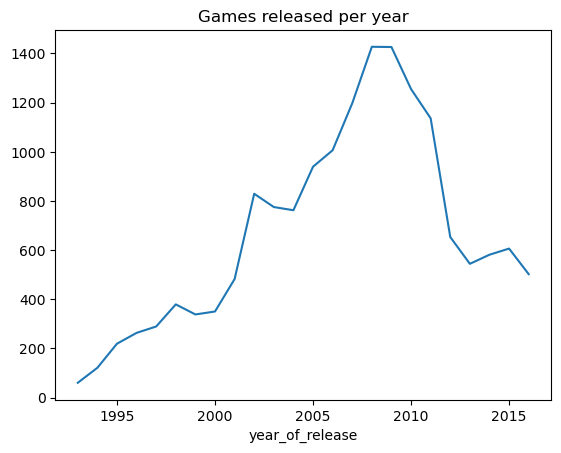

In [540]:
games.groupby('year_of_release')['name'].count().plot(kind='line',title='Games released per year')

plt.show()

In [541]:
top_sales_platforms = list(games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)

print(top_sales_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


<Axes: title={'center': 'Sales per platform'}, xlabel='year_of_release'>

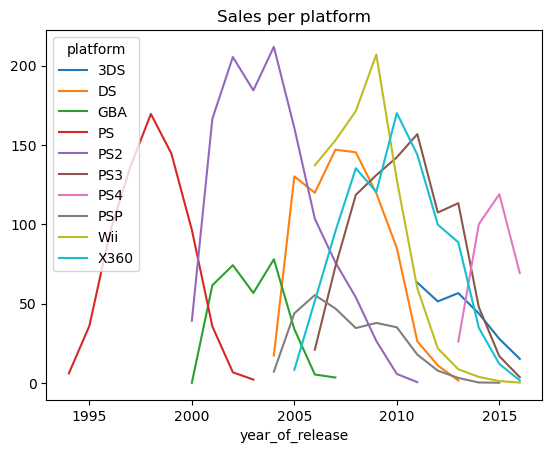

In [542]:
games[games['platform'].isin(top_sales_platforms)].pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Top platfrom sales')

plt.show()

<Axes: title={'center': 'Sales per manufacturer'}, xlabel='year_of_release'>

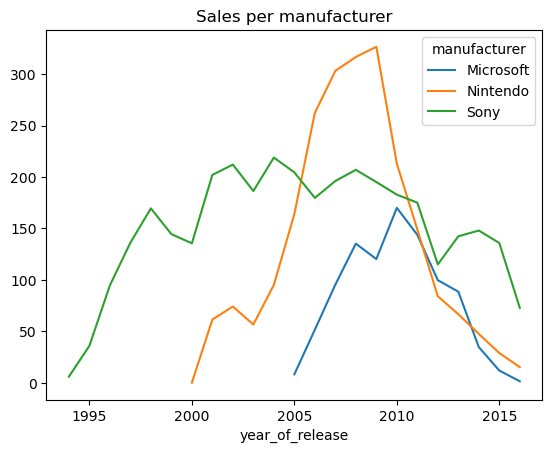

In [543]:
games[games['platform'].isin(top_sales_platforms)].pivot_table(index='year_of_release',
                  columns='manufacturer',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Sales per manufacturer')

plt.show()

<Axes: title={'center': 'Xbox Sales per years'}, xlabel='year_of_release'>

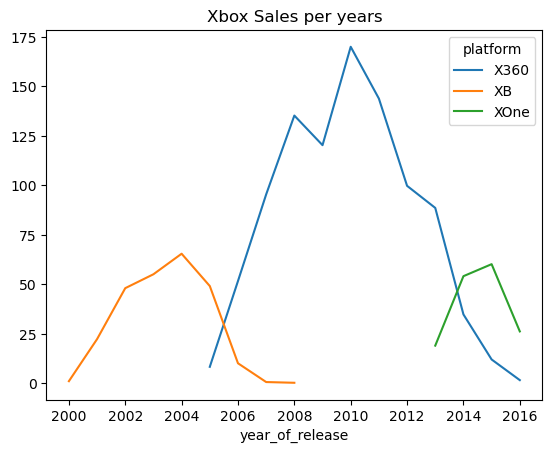

In [544]:
games[games['platform'].isin(xbox)].pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Xbox Sales')

plt.show()

<Axes: title={'center': 'Sales per manufacturer'}, xlabel='year_of_release'>

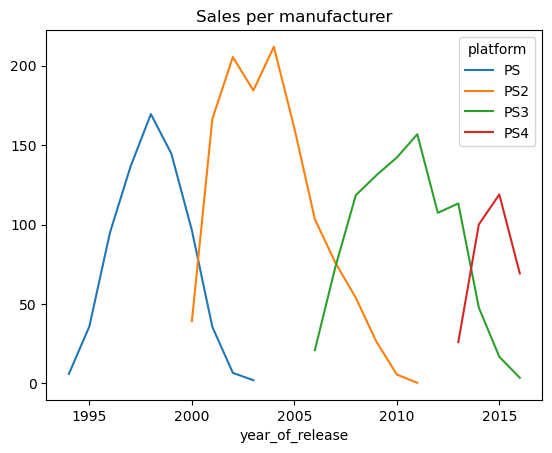

In [545]:
games[games['platform'].isin(ps)].pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Sony sales')

plt.show()

<Axes: title={'center': 'Sales per manufacturer'}, xlabel='year_of_release'>

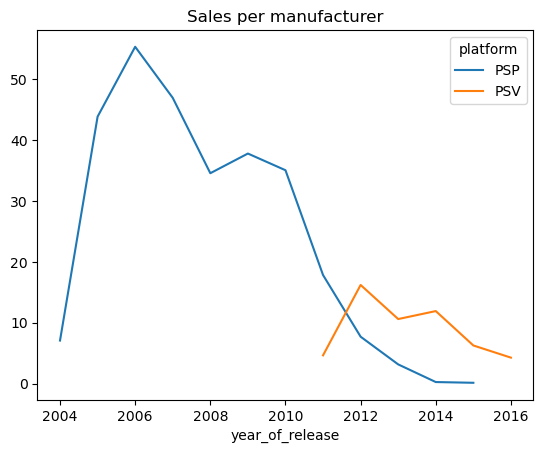

In [546]:
games[games['platform'].isin(ps_handheld)].pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Sony Handheld sales')

plt.show()

<Axes: title={'center': 'Sales per manufacturer'}, xlabel='year_of_release'>

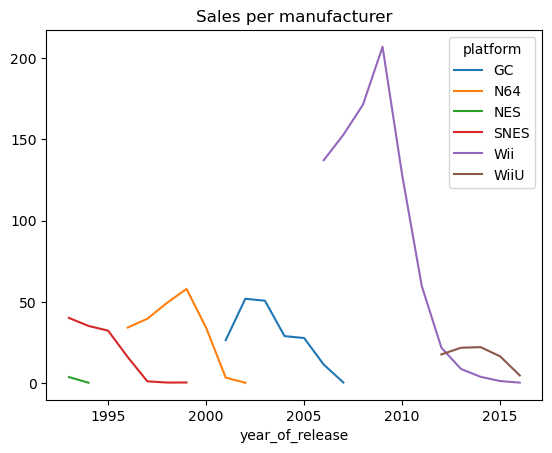

In [547]:
games[games['platform'].isin(nintendo)].pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Nintendo Sales')

plt.show()

<Axes: title={'center': 'Sales per manufacturer'}, xlabel='year_of_release'>

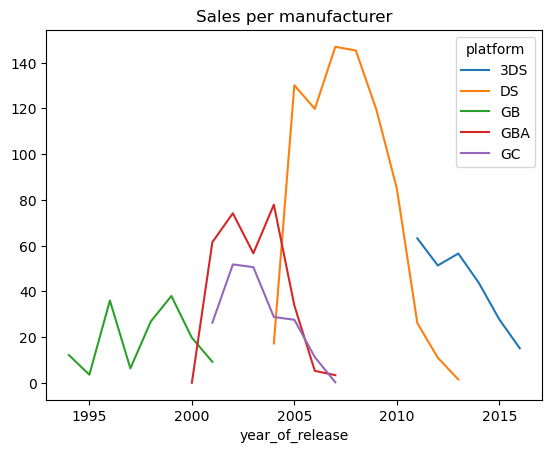

In [548]:
games[games['platform'].isin(nintendo_handheld)].pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Nintendo Handheld sales')

plt.show()

In [550]:

sales_per_year = games[games['platform'].isin(top_sales_platforms)].pivot_table(
                                index='year_of_release',
                                columns='platform',
                                values='total_sales',
                                aggfunc='sum')


print(sales_per_year)


platform           3DS      DS    GBA      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1994.0             NaN     NaN    NaN    6.03     NaN     NaN     NaN    NaN   
1995.0             NaN     NaN    NaN   35.96     NaN     NaN     NaN    NaN   
1996.0             NaN     NaN    NaN   94.70     NaN     NaN     NaN    NaN   
1997.0             NaN     NaN    NaN  136.17     NaN     NaN     NaN    NaN   
1998.0             NaN     NaN    NaN  169.49     NaN     NaN     NaN    NaN   
1999.0             NaN     NaN    NaN  144.53     NaN     NaN     NaN    NaN   
2000.0             NaN     NaN   0.07   96.37   39.17     NaN     NaN    NaN   
2001.0             NaN     NaN  61.53   35.59  166.43     NaN     NaN    NaN   
2002.0             NaN     NaN  74.16    6.67  205.38     NaN     NaN    NaN   
2003.0             NaN     NaN  56.67    2.07  184.31     NaN     NaN    NaN   
2004.0             NaN   17.27  77.91   

In [552]:
games.groupby('platform')['year_of_release'].nunique().sort_values(ascending=False)

platform
PC      23
PS2     12
PSP     12
X360    12
Wii     11
PS3     11
DS      10
PS      10
XB       9
GB       8
GBA      8
GC       7
N64      7
SNES     7
DC       7
SAT      6
3DS      6
PSV      6
WiiU     5
XOne     4
PS4      4
NG       4
WS       3
SCD      2
NES      2
GEN      2
3DO      2
TG16     1
PCFX     1
Name: year_of_release, dtype: int64

El ciclo de vida de las consolas de videojuegos *normalmente* ronda entre los 7 y los 12 años, a excepción del PC que es un caso especial ya que tiene diferentes funciones y ha evolucionado con el tiempo pero no ha cambiado de nombre.



<Axes: xlabel='platform'>

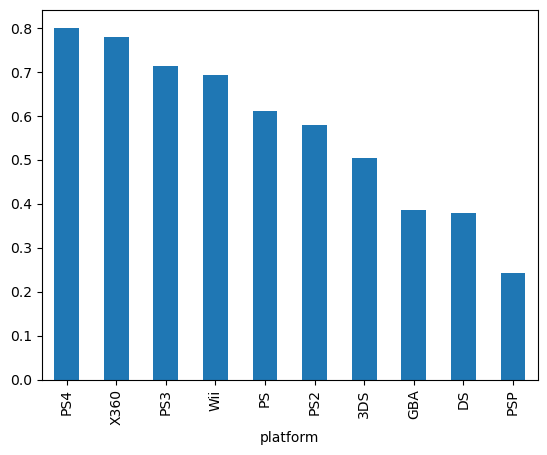

In [553]:
games[games['platform'].isin(top_sales_platforms)].groupby('platform')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')

In [554]:
games.query('platform == "XOne"')[['total_sales','critic_score_float']].corr()

,total_sales,critic_score_float
total_sales,1.000000,0.416998
critic_score_float,0.416998,1.000000


In [556]:
games.groupby('name')['platform'].nunique().sort_values(ascending=False)

name
Need for Speed: Most Wanted     10
LEGO Marvel Super Heroes         9
Ratatouille                      9
FIFA 14                          9
Terraria                         8
                                ..
Indianapolis 500 Evolution       1
Indy Racing 2000                 1
Indycar Series 2005              1
Infamous: First Light            1
¡Shin Chan Flipa en colores!     1
Name: platform, Length: 11174, dtype: int64

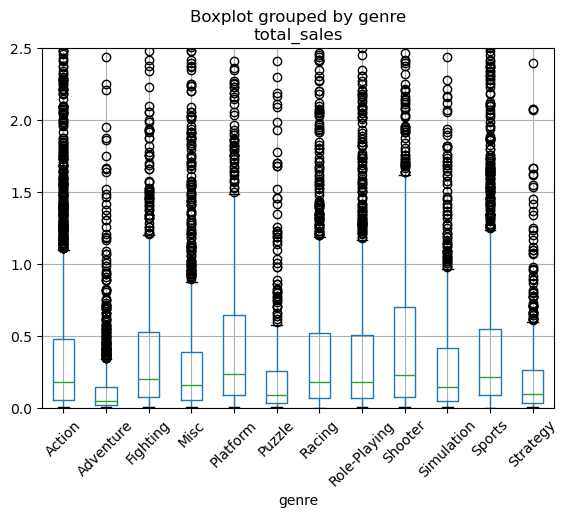

In [557]:
games.boxplot(column='total_sales',
              by='genre')

plt.ylim(0,2.5)
plt.xticks(rotation=45)
plt.show()